In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Reading the data set
ds=pd.read_csv("wdbc.csv", header=None)
df = pd.DataFrame(ds)

In [3]:
#Deleting the Column ID
del df[0]

In [4]:
#Encoding the Target Variable into binary
df.iloc[:,0].replace('B', 0,inplace=True)
df.iloc[:,0].replace('M', 1,inplace=True)


In [5]:
#Separate the Feature variables and the Target Variable
X = df.iloc[:, 1:] 
Y = df.iloc[:,0:1]

In [6]:
#printing the dataset 
X

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [7]:
#printing the dataset Y

Y

,1
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [8]:

#5. Need to Bring the X and Y for train and test into appropriate shapes to be compatible for computations.
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
Y_scaled = min_max_scaler.fit_transform(Y)

In [9]:
X_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [10]:
epochs=5000
learningrate=0.01

In [11]:
#Splitting the datset into Training, testing and validation
train_x,test_x,train_y,test_y = train_test_split(X_scaled,Y_scaled,test_size = 0.2, random_state = 42)
test_x,x_validate,test_y,y_validate = train_test_split(test_x,test_y,test_size=0.5,random_state = 42)
train_x.shape

(455, 30)

In [12]:
train_x.shape

(455, 30)

In [13]:
train_y.shape

(455, 1)

In [14]:
test_x.shape

(57, 30)

In [15]:
test_y.shape

(57, 1)

In [16]:
train_x, train_y = train_x.T, train_y.reshape(1, train_y.shape[0]) 
test_x, test_y = test_x.T, test_y.reshape(1, test_y.shape[0])
x_validate,y_validate= x_validate.T, y_validate.reshape(1, y_validate.shape[0])

In [17]:
x_validate.shape

(30, 57)

In [18]:
y_validate.shape

(1, 57)

In [19]:
#Initializing weights and bias
losstrack = []
m = train_x.shape[1]
weight = np.zeros(shape=(30, 1))
bias = 0
y_pred_train_1=[]

In [20]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [21]:

def predict(weight,bias,param_x):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(weight.T,param_x)+bias)
    Y_prediction = np.zeros((1,param_x.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


cost after 0  0.6931471805599453
cost after 100  0.6654056220769112
cost after 200  0.6410409455996944
cost after 300  0.6188244441466817
cost after 400  0.5983728791309806
cost after 500  0.5794850836421037
cost after 600  0.5620067099938221
cost after 700  0.545802944762062
cost after 800  0.5307528018474342
cost after 900  0.5167474794492557
cost after 1000  0.5036893556057249
cost after 1100  0.49149102841440895
cost after 1200  0.48007434757505907
cost after 1300  0.46936946789662976
cost after 1400  0.4593139545673517
cost after 1500  0.44985195786271304
cost after 1600  0.4409334648438869
cost after 1700  0.4325136288705972
cost after 1800  0.4245521737221265
cost after 1900  0.4170128669450954
cost after 2000  0.40986305607003376
cost after 2100  0.40307326110125863
cost after 2200  0.39661681687956657
cost after 2300  0.3904695593464455
cost after 2400  0.38460955027715943
cost after 2500  0.3790168356222082
cost after 2600  0.3736732331579836
cost after 2700  0.36856214567379

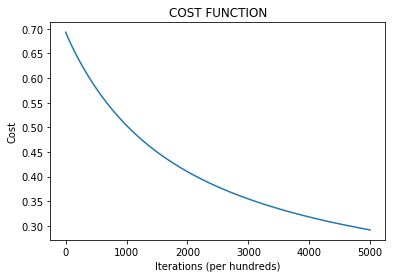

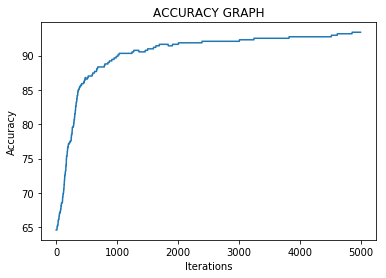

train accuracy: 93.4065934065934 %
[[283   3]
 [ 27 142]]
455
On training set:
Accuracy using TP FP:   93.4065934065934
On training set:
True Positive:   142
True Negative:   283
False Negative:   27
False Positive:   3
True Positive Rate / Recall: 84.02%
Precision: 97.93%
False Positive Rate / Fallout: 1.05%
test accuracy: 92.98245614035088 %
On Test set:
True Positive:   23
True Negative:   30
False Negative:   4
False Positive:   0
True Positive Rate / Recall: 85.19%
Precision: 100.00%
False Positive Rate / Fallout: 0.00%


In [22]:
for epoch in range(epochs):
    a = np.dot(weight.T, train_x) + bias
    p = sigmoid(a)
    
    #Loss Function
    cost = -np.sum(np.multiply(np.log(p), train_y) + np.multiply((1 - train_y), np.log(1 - p)))/m
    losstrack.append(np.squeeze(cost))
    dz = p-train_y
    dw = (1 / m) * np.dot(train_x, dz.T)
    db = (1 / m) * np.sum(dz)
    weight = weight - learningrate * dw
    bias = bias - learningrate * db
    if epoch % 100 == 0:
        print('cost after '+ str(epoch)+ '  '+ str(cost))
    y_pred_train=predict(weight,bias,train_x)
    y_pred_train_1.append((100 - np.mean(np.abs(y_pred_train - train_y)) * 100))
    
plt.plot(losstrack)

plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('COST FUNCTION')
plt.show()


plt.plot(y_pred_train_1)

plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title("ACCURACY GRAPH")
plt.show()



y_prediction_train = predict(weight,bias,train_x)
y_prediction_test = predict(weight,bias,test_x)

accuracy_train= (100 - np.mean(np.abs(y_prediction_train - train_y)) * 100)

print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - train_y)) * 100))
cm = confusion_matrix(train_y.T, y_prediction_train.T)
print(cm)


truePositive = 0
trueNegative = 0
falseNegative = 0
falsePositive = 0

predList = y_prediction_train.tolist()
tlist = train_y.tolist()

array_length = len(predList[0])
print(array_length)
for i in range(array_length):
    if predList[0][i] == 1 and tlist[0][i] == 1:
        truePositive += 1
    elif predList[0][i] == 0 and tlist[0][i] == 0:
        trueNegative += 1
    elif predList[0][i] == 0 and tlist[0][i] == 1:
        falseNegative += 1
    elif predList[0][i] == 1 and tlist[0][i] == 0 :
        falsePositive += 1
    else:
        print(predList[0][i])
        print(tlist[0][i])

tpr = truePositive / (truePositive + falseNegative) * 100
fpr = falsePositive / (falsePositive + trueNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

Accuracy = (truePositive+ trueNegative)/(truePositive+ trueNegative+falsePositive+falseNegative) *100
Precision =(truePositive/(truePositive+falsePositive))*100

print("On training set:\nAccuracy using TP FP:  ", Accuracy)
print("On training set:\nTrue Positive:  ", truePositive)
print("True Negative:  ", trueNegative)
print("False Negative:  ", falseNegative)
print("False Positive:  ", falsePositive)
print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
print("Precision: %.2f" %precision+str('%'))
print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))


#test and validate accuracy

accuracy_test= (100 - np.mean(np.abs(y_prediction_test - test_y)) * 100)

print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_y)) * 100))


truePositive = 0
trueNegative = 0
falseNegative = 0
falsePositive = 0
predList = y_prediction_test.tolist()
tlist = test_y.tolist()

array_length = len(predList[0])
for i in range(array_length):
    if predList[0][i] == 1 and tlist[0][i] == 1:
        truePositive += 1
        
    elif predList[0][i] == 0 and tlist[0][i] == 0:
        trueNegative += 1
    elif predList[0][i] == 0 and tlist[0][i] == 1:
        falseNegative += 1
    elif predList[0][i] == 1 and tlist[0][i] == 0 :
        falsePositive += 1
    else:
        print(predList[0][i])
        print(tlist[0][i])
        
tpr = truePositive / (truePositive + falseNegative) * 100
fpr = falsePositive / (falsePositive + trueNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("On Test set:\nTrue Positive:  ", truePositive)
print("True Negative:  ", trueNegative)
print("False Negative:  ", falseNegative)
print("False Positive:  ", falsePositive)
print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
print("Precision: %.2f" %precision+str('%'))
print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))


cost after 0  0.03423074628333998
cost after 100  0.03419575608263768
cost after 200  0.03416089937084845
cost after 300  0.03412617307746821
cost after 400  0.034091574431340914
cost after 500  0.034057100925108295
cost after 600  0.034022750283970955
cost after 700  0.03398852043823264
cost after 800  0.033954409499164805
cost after 900  0.033920415737785696
cost after 1000  0.03388653756619858
cost after 1100  0.03385277352117728
cost after 1200  0.033819122249725594
cost after 1300  0.033785582496370835
cost after 1400  0.03375215309198118
cost after 1500  0.03371883294392196
cost after 1600  0.03368562102738919
cost after 1700  0.03365251637777767
cost after 1800  0.03361951808395909
cost after 1900  0.03358662528236026
cost after 2000  0.03355383715174511
cost after 2100  0.03352115290861582
cost after 2200  0.03348857180315872
cost after 2300  0.03345609311566956
cost after 2400  0.03342371615340066
cost after 2500  0.033391440247779416
cost after 2600  0.03335926475195387
cost 

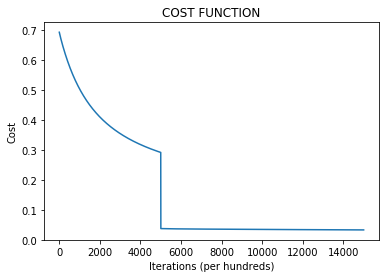

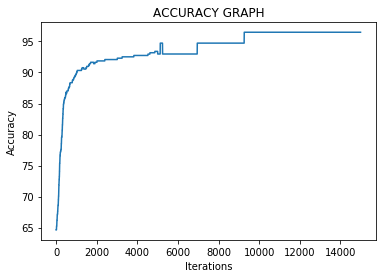

Test accuracy: 96.49122807017544 %
On Test set:
True Positive:   26
True Negative:   29
False Negative:   1
False Positive:   1
True Positive Rate / Recall: 96.30%
Precision: 96.30%
False Positive Rate / Fallout: 3.33%


In [24]:
#calcuaktion cost and accuracy for test and validation set
for epoch in range(epochs):
    a = np.dot(weight.T, test_x) + bias
    p = sigmoid(a)
    
    #Loss Function
    cost = -np.sum(np.multiply(np.log(p), test_y) + np.multiply((1 - test_y), np.log(1 - p)))/m
    losstrack.append(np.squeeze(cost))
    dz = p-test_y
    dw = (1 / m) * np.dot(test_x, dz.T)
    db = (1 / m) * np.sum(dz)
    weight = weight - learningrate * dw
    bias = bias - learningrate * db
    if epoch % 100 == 0:
        print('cost after '+ str(epoch)+ '  '+ str(cost))
    y_pred_train=predict(weight,bias,test_x)
    y_pred_train_1.append((100 - np.mean(np.abs(y_pred_train - test_y)) * 100))
    
plt.plot(losstrack)

plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title("COST FUNCTION")
plt.show()


plt.plot(y_pred_train_1)

plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title("ACCURACY GRAPH")
plt.show()



y_prediction_val = predict(weight,bias,test_x)

accuracy_val= (100 - np.mean(np.abs(y_prediction_val - test_y)) * 100)

print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_val - test_y)) * 100))


truePositive = 0
trueNegative = 0
falseNegative = 0
falsePositive = 0
predList = y_prediction_val.tolist()
tlist = test_y.tolist()

array_length = len(predList[0])
for i in range(array_length):
    if predList[0][i] == 1 and tlist[0][i] == 1:
        truePositive += 1
        
    elif predList[0][i] == 0 and tlist[0][i] == 0:
        trueNegative += 1
    elif predList[0][i] == 0 and tlist[0][i] == 1:
        falseNegative += 1
    elif predList[0][i] == 1 and tlist[0][i] == 0 :
        falsePositive += 1
    else:
        print(predList[0][i])
        print(tlist[0][i])
        
tpr = truePositive / (truePositive + falseNegative) * 100
fpr = falsePositive / (falsePositive + trueNegative) * 100
precision = truePositive / (truePositive + falsePositive) * 100

print("On Test set:\nTrue Positive:  ", truePositive)
print("True Negative:  ", trueNegative)
print("False Negative:  ", falseNegative)
print("False Positive:  ", falsePositive)
print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
print("Precision: %.2f" %precision+str('%'))
print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))
